# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # weather_json = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | saint george
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | kharp
Processing Record 13 of Set 1 | grand gaube
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | orda
Processing Record 17 of Set 1 | salvacion
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | alice springs
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | khatanga
Processing R

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,28.98,91,72,1.79,EC,1680360011
1,mataura,-46.1927,168.8643,13.04,91,66,1.23,NZ,1680360011
2,esperance,-33.8667,121.9000,18.57,77,99,5.03,AU,1680360012
3,yellowknife,62.4560,-114.3525,-16.71,66,100,7.72,CA,1680359934
4,rikitea,-23.1203,-134.9692,26.39,81,42,6.64,PF,1680360013


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,28.98,91,72,1.79,EC,1680360011
1,mataura,-46.1927,168.8643,13.04,91,66,1.23,NZ,1680360011
2,esperance,-33.8667,121.9000,18.57,77,99,5.03,AU,1680360012
3,yellowknife,62.4560,-114.3525,-16.71,66,100,7.72,CA,1680359934
4,rikitea,-23.1203,-134.9692,26.39,81,42,6.64,PF,1680360013


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

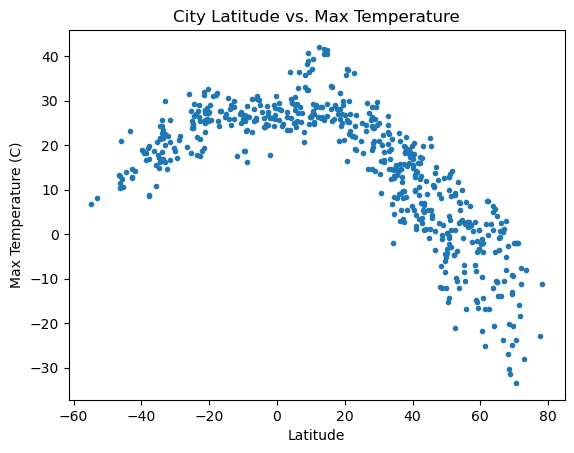

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='.')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

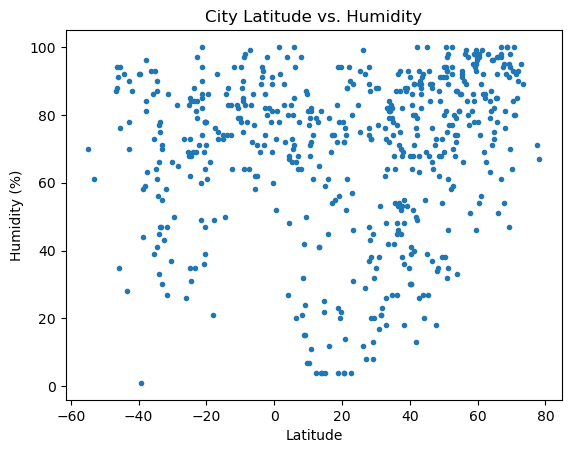

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker=".")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

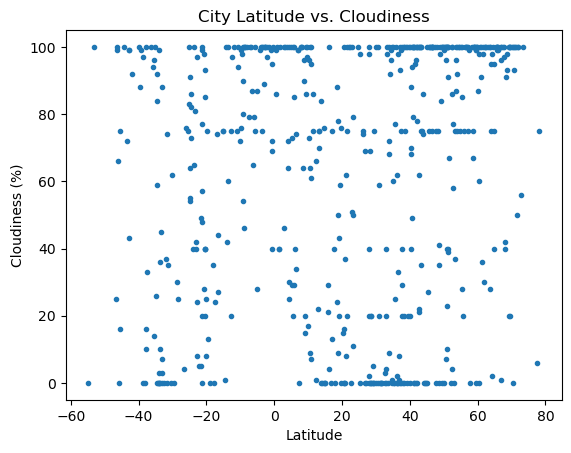

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='.')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

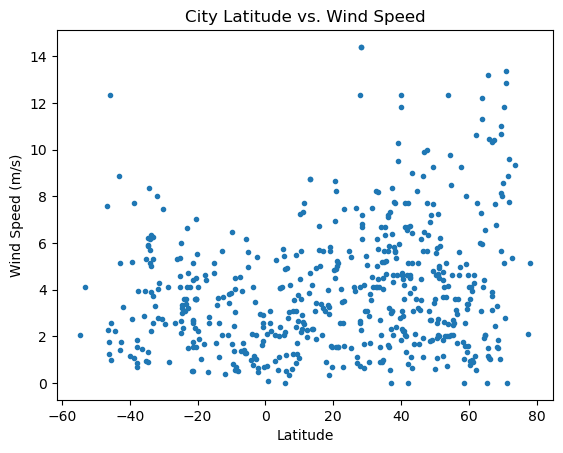

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='.')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def lin_function(x_values,y_values, a, b):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r-value is: {rvalue**2}")
    plt.scatter(x_values, y_values, marker='.')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,yellowknife,62.4560,-114.3525,-16.71,66,100,7.72,CA,1680359934
8,saint george,37.1041,-113.5841,3.33,75,0,0.00,US,1680359949
10,kharp,66.8014,65.8081,0.48,98,100,3.72,RU,1680360014
12,georgetown,5.4112,100.3354,30.96,70,20,2.06,MY,1680360014
14,orda,57.1951,56.9091,2.12,97,100,5.63,RU,1680360015


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,28.98,91,72,1.79,EC,1680360011
1,mataura,-46.1927,168.8643,13.04,91,66,1.23,NZ,1680360011
2,esperance,-33.8667,121.9000,18.57,77,99,5.03,AU,1680360012
4,rikitea,-23.1203,-134.9692,26.39,81,42,6.64,PF,1680360013
5,hobart,-42.8794,147.3294,12.92,78,99,5.14,AU,1680359414


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7665007681385247


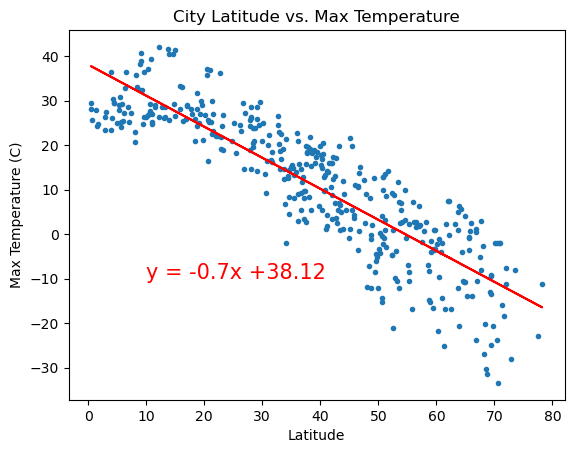

In [57]:
# Linear regression on Northern Hemisphere
lin_function(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],10,-10)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.show()


The r-value is: 0.4785645490746952


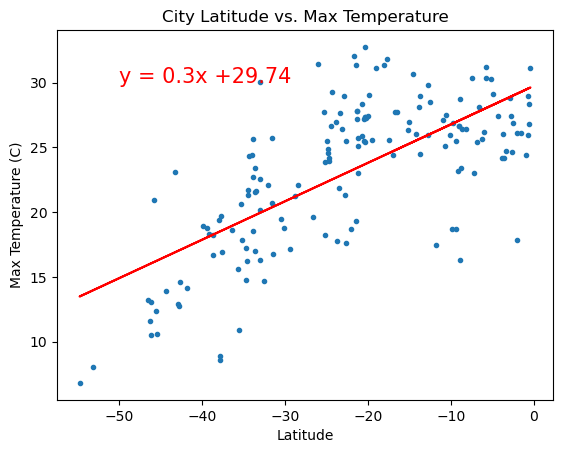

In [59]:
# Linear regression on Southern Hemisphere
lin_function(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],-50,30)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:**
 Since the latitude of the equator is 0 and higher temps are found here, we would expect a negative correlation in the Northern Hemisphere and a positive correlation in the Southern Hemisphere.  The correlation in the North, however, is much stronger than in the South.    

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11944894494822955


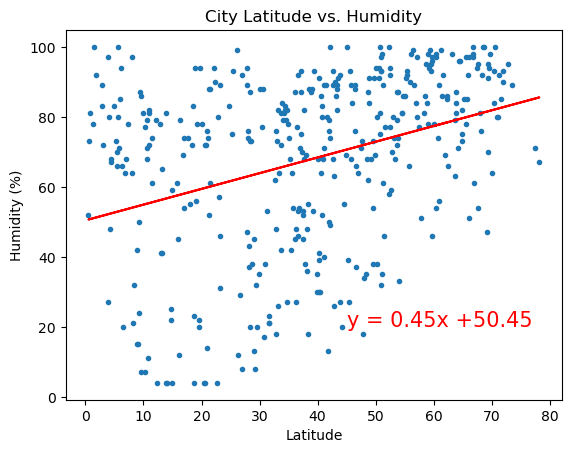

In [60]:
# Northern Hemisphere
lin_function(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 45, 20)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()

The r-value is: 0.05462626052861169


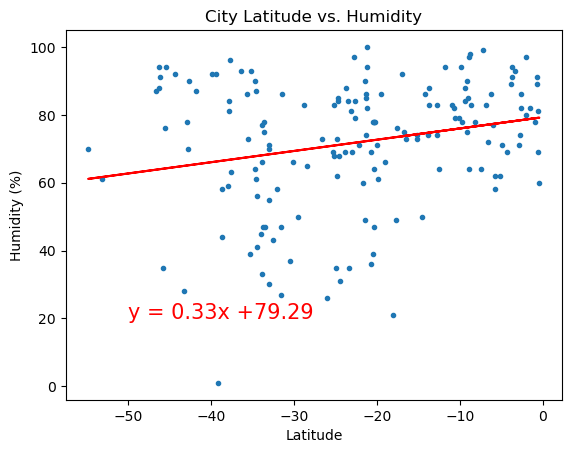

In [62]:
# Southern Hemisphere
lin_function(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], -50, 20)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** Both are positive correlations and a slightly stronger correlation in the Northern Hemisphere.  Humidity increase as you near the equator in the south, but decreases as you near the equator in the north.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05178680476902866


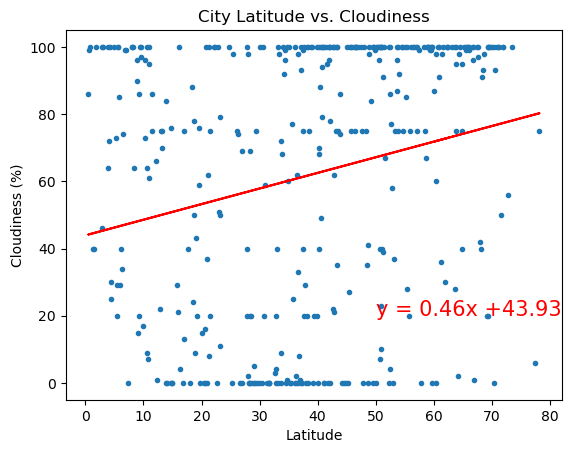

In [63]:
# Northern Hemisphere
lin_function(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 50, 20)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show()

The r-value is: 0.10309093284391967


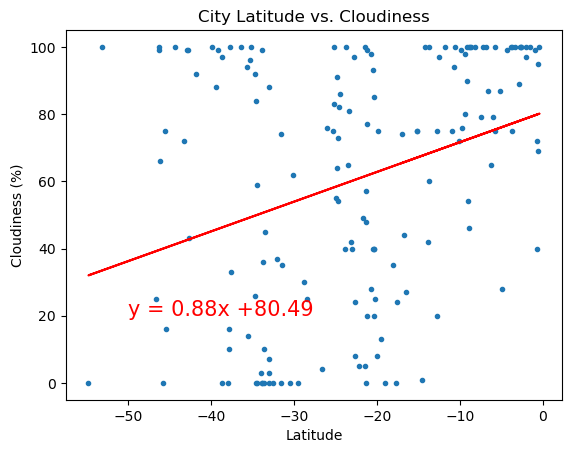

In [65]:
# Southern Hemisphere
lin_function(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], -50, 20)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** Both are positive correlations and a much stronger correlation in the Southern Hemisphere.  Cloudiness increases as you near the equator in the south, but decreases as you near the equator in the north. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.041535232815246556


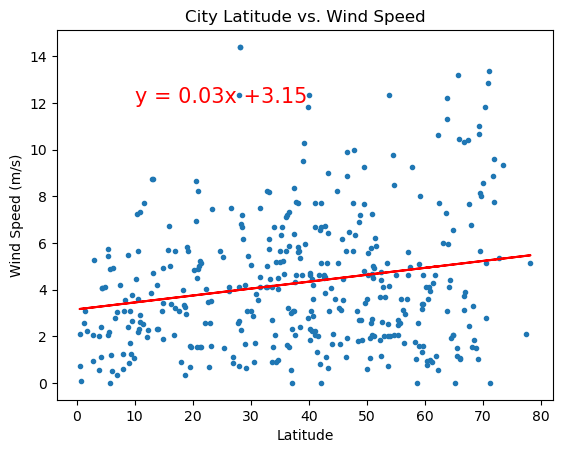

In [67]:
# Northern Hemisphere
lin_function(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 10, 12)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.show()

The r-value is: 0.06762631541599987


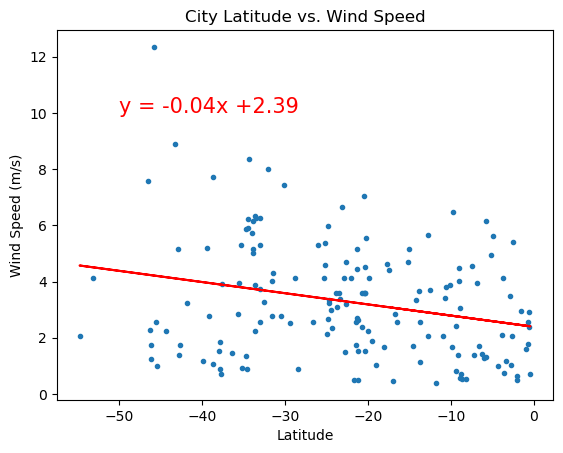

In [69]:
# Southern Hemisphere
lin_function(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], -50, 10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** A small positive correlation in the Northern Hemisphere and a small negative correlation in the Southern Hemisphere.  Both indicating that wind speeds lessen as you near the equator. 